#   INTRODUCTION

This is a Movies Industry Dataset containing information of movies from 1980 to 2020. I will be doing exploratory an correlation Data analysis to understand the data better
<br>

Title: **Movies Industry Data Analysis**

Author: **Harshit Bansal**

***

## Movies Industries EDA and Correlation Analysis 
***
<br>

# 1. Prepare

We are using Python to prepare and process the data.


#### 1.1 Preparing the Environment

The ```pandas, pandas, matplotlib, datetime, seaborn``` packages are installed and aliased for easy reading.



In [12]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

#### 1.2 Importing data set


reading the Selected files for Data Analysis

In [15]:
## read_csv function to read the required csv file
Movies_Data = pd.read_csv('E:/studies/Harsh/Post degree/Portfolio Projects/Movie Industry Dataset/movies.csv') 


# 2. Data Cleaning and manipulation

Steps

1. Observe and familiarize with data

2. Check for null or missing values

3. Columns Transformation if needed

### 2.1 Previewing Data

Previewing the data of Movies_Data to get familiarise with the data.

In [16]:
# preview the data with all columns

Movies_Data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


### 2.2 Checking for Missing Values

Then, finding out whether there is any null or missing values in `Movies_Data`.

In [17]:
# obtain the Number of missing data points per column
missing_values_count = Movies_Data.isnull().sum()

# look at the Number of missing points in all columns
missing_values_count[:]

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

We have various missing values which we need to address before going further ahead

- Missing values in *rating* column will be replaced be **Not Specified**.
- Missing values in *Budget* column will be replaced be **0**.
- Missing values in *Gross* column will be replaced be **0**.
- remaining missing values are very less in numbers so we going to delete those rows


In [20]:
# Replacing Missing Values in Rating Cloumn by "Not Specified"
Movies_Data.rating = Movies_Data.rating.fillna('Not Specified')

# Replacing Missing Values in Budget Cloumn by "0"
Movies_Data.budget = Movies_Data.budget.fillna(0)

# Replacing Missing Values in Gross Cloumn by "0"
Movies_Data.gross = Movies_Data.gross.fillna(0)

Now drop remaining missing values data considering that they represent a very small percentage of our dataset

In [23]:
# Dropping Rows with Missing Values
for col in Movies_Data.columns:
    Movies_Data.dropna(subset = [col], inplace=True)
    Movies_Data.reset_index()

### 2.3 Basic Info of Data

Finding out the basic information of  `Movies_Data`:
* no. of rows and columns
* name of columns
* type of value

In [26]:
# show basic information of data in Movies_Data
Movies_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7643 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7643 non-null   object 
 1   rating    7643 non-null   object 
 2   genre     7643 non-null   object 
 3   year      7643 non-null   int64  
 4   released  7643 non-null   object 
 5   score     7643 non-null   float64
 6   votes     7643 non-null   float64
 7   director  7643 non-null   object 
 8   writer    7643 non-null   object 
 9   star      7643 non-null   object 
 10  country   7643 non-null   object 
 11  budget    7643 non-null   float64
 12  gross     7643 non-null   float64
 13  company   7643 non-null   object 
 14  runtime   7643 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 955.4+ KB


From the above observation, noted that

1. There is no typo, Null or missing values remaining in the dataset

2. Movies_Data has 7643 rows and 15 columns.

3. *Budget* , *Gross* & *Votes* is wrongly classified as ```object``` dtype and has to be converted to ```int``` dtype.

4. released column contains relased date and releaed country which needs to be split into two columns.

### 2.4 Data Transformation

A brief description of what the following transformations aim to do:

1. Convert the data types of *budget*, *gross* and *votes* to ```integer``` dtype.

2. Split the *released* column into *released_date* and *released_country*. Then change the *released_date* data type to a ```time``` series.

3. drop the *released* column. Insert the released_date year as the *year* column.

4. Rename the **'not rated'** values in the rating column to simply **'unranked'** (which is also a label), to reduce redundancy


Converting the *budget*, *gross* and *votes* data type from ```object``` to ```integer``` data type.

In [27]:
# Converting Columns Data Type 
Movies_Data.budget = Movies_Data.budget.astype('int64')
Movies_Data.gross = Movies_Data.gross.astype('int64')
Movies_Data.votes = Movies_Data.votes.astype('int64')

spliting the *released* column into *released_date* and *released_country*. Then change the *released_date* data type to a ```time``` series.

In [ ]:
# Split the released column into Released_date and released_country column

Movies_Data['Released_Date'] = Movies_Data.released.str.split('(',expand=True)[0]
Movies_Data['Released_Date'] = pd.to_datetime(Movies_Data.Released_Date)
Movies_Data['Released_Country'] = Movies_Data.released.str.split('(',expand=True)[1].str.replace(r'[^a-zA-Z\d\s:]', '')

Updating *year* column with appropriate years from ***Released_date*** and Deleting *released* column from the dataset.

In [31]:
# Updating year column with appropriate years from Released_date
Movies_Data['year'] = Movies_Data.Released_Date.dt.year

# Deleting released column from the dataset
Movies_Data = Movies_Data.drop(['released'],axis=1)

Renaming 'Not Rated' values in ***rating*** column to simply 'unranked' to reduce redundancy

In [32]:
# Renaming 'Not Rated' values in rating column to simply 'unranked' to reduce redundancy
Movies_Data['rating'] = Movies_Data.rating.str.replace('Not Rated', 'UnRated')

Data cleaning and manipulation is completed. Hence, data is now ready to be analysed. 

***

<br>

# 3. Analyse

#### 3.1 Perform calculations

Pulling the statistics of `Movies_Data` for analysis:
* count - no. of rows
* mean (average)
* std (standard deviation)
* min and max
* percentiles 25%, 50%, 75%

In [34]:
# Pulling general statistics of Movies_Data Data
Movies_Data.describe()

,year,score,votes,budget,gross,runtime
count,7625.000000,7643.000000,7.643000e+03,7.643000e+03,7.643000e+03,7643.000000
mean,2000.648525,6.392045,8.832621e+04,2.559012e+07,7.677317e+07,107.291509
std,11.135847,0.968163,1.635009e+05,3.862666e+07,1.643276e+08,18.574868
min,1980.000000,1.900000,7.000000e+00,0.000000e+00,0.000000e+00,63.000000
25%,1991.000000,5.800000,9.200000e+03,0.000000e+00,3.941398e+06,95.000000
50%,2001.000000,6.500000,3.300000e+04,1.200000e+07,1.915201e+07,104.000000
75%,2010.000000,7.100000,9.400000e+04,3.200000e+07,7.314045e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


Interpreting statistical findings of Movies Data:

1. On average, film runtime is 1h 46 mins.
2. Average gross is almost 3 times average budget. which means most films make quit a lot of mone by their films.
3. The studied time lapse goes from 1980 to 2020.
4. Average score of movies in data set is 6.3 rating. 

***



# 4. Share

In this step, we are creating visualizations and communicating our findings based on our analysis.

### 4.1 Expolatory Data Analysis (EDA)

#### 1. Number of movies Released per year

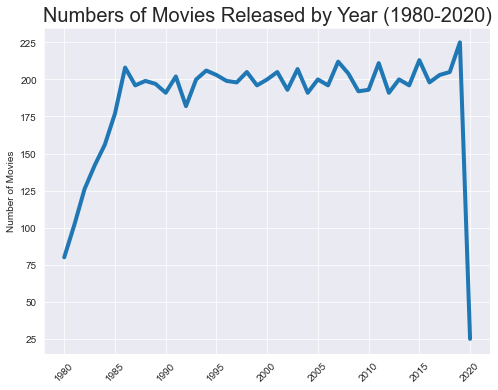

In [36]:
# Grouping Data by years
Release_year = Movies_Data.groupby('year').count()

# Plotting Line Graph
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.lineplot(x= Release_year.index,y= 'name',data=Release_year,linewidth=4)

# adding annotations and visuals
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.xlabel('')
plt.title('Numbers of Movies Released by Year (1980-2020)',fontsize= 20);



From the line graph, we discovered that:

1. on Average there are around 200 movies made per year

2. In period 1980 - 1986 avarege numbers of movies made is very less as compared to other years. this might be becasue till 1986 the movies industry was not properly established.

3. In 2020 we can see a sudden drop in number of the movies made thisis mainly becasue of coronavirus as movies theter were closed globaly resulting in very less production of moviesin 2020.
<br>



#### 2. Number of movies Released per company

Text(0.5, 1.0, 'Numbers of Movies Released by Companies')

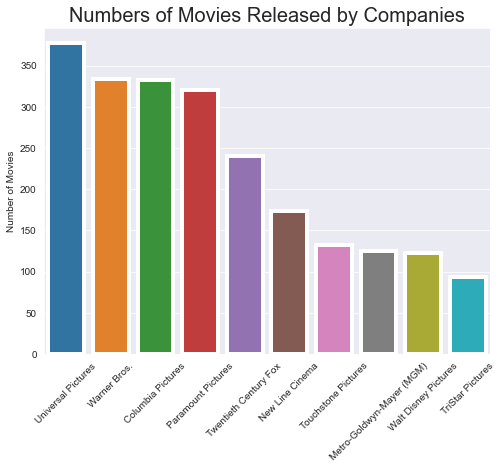

In [45]:
 #Grouping Data by company
Company = Movies_Data.groupby('company').count().sort_values(by = 'budget',ascending=False).head(10)

# Plotting bar Graph
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.barplot(x= Company.index,y= 'name',data=Company,linewidth=4)

# adding annotations and visuals
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.xlabel('')
plt.title('Numbers of Movies Released by Companies',fontsize= 20);


From the bar graph, we discovered that:

1. Univeral pictures has the higgest number of movies made with 377 movies and it is the only company having 350 + movies. 

2. Only 8 companies have made more than 100 movies in past 3 decades. suggesting brand / company name matters a lot in movies industry.


<br>



#### 3. Top 5 movies by gross revenue

Text(0.5, 1.0, 'Top 5 Movies by Revenue')

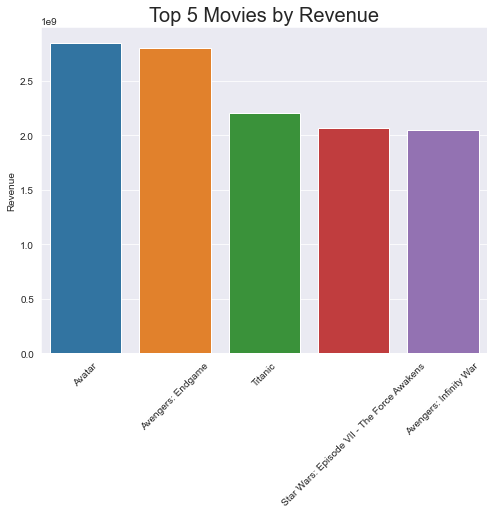

In [48]:
#Determining top 5 movies by gross revenue
Top5 = Movies_Data.sort_values(by='gross',ascending=False).head(5)

# Plotting bar Graph
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.barplot(x='name',y='gross',data=Top5);

# adding annotations and visuals
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.xlabel('')
plt.title('Top 5 Movies by Revenue',fontsize= 20);


From the bar graph, we discovered that:

1. Avatar movie have made the highest revenue which is around 2.4 billion.

2.  by looking at data we can see Only 5 movies have made more than 2 billion and only 9 movies have made more than 1.5 billion revenue

<br>



#### 4. Which directors have generated the most revenue and have highest number of movies

Text(0, 0.5, 'Revenue')

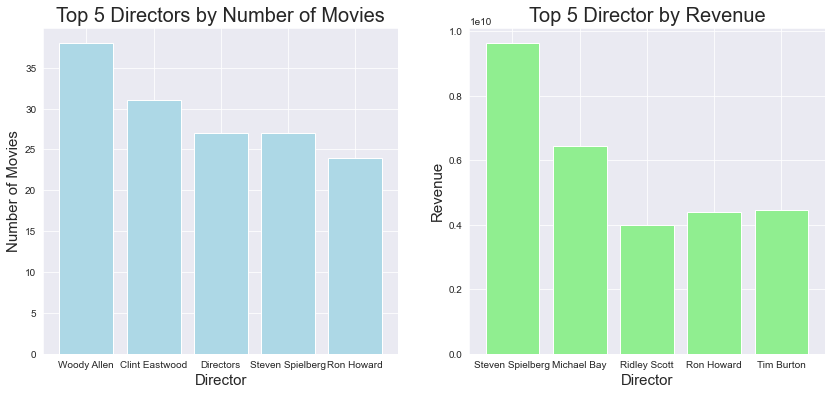

In [83]:
#Determining top 5 director by revenue and nummber of movies
Director_revenue = Movies_Data.groupby('director').sum().sort_values(by='budget',ascending=False).head(5)
Director_Movies_Number = Movies_Data.groupby('director').count().sort_values(by = 'budget',ascending=False).head(5)

# Plotting bar Graphs
fig, (ax1, ax2) =  plt.subplots(1, 2)
sns.set_style('darkgrid')
plt.gcf().set_size_inches(14, 6)
ax1.bar(Director_Movies_Number.index,Director_Movies_Number.gross,color='lightblue')
ax2.bar(Director_revenue.index,Director_revenue.gross,color='lightgreen')

# adding annotations and visuals
ax1.set_title('Top 5 Directors by Number of Movies',fontsize= 20)
ax2.set_title('Top 5 Director by Revenue',fontsize= 20)
ax1.set_xlabel('Director',fontsize= 15)
ax2.set_xlabel('Director',fontsize= 15)
ax1.set_ylabel('Number of Movies',fontsize= 15)
ax2.set_ylabel('Revenue',fontsize= 15)


From the above bar graphs, we discovered that:

1. we can see that woody allen have made the most number of movies in past decade (38 movies),however steven spielding has made the most money from his movies despite relatively less number of movies. 

2.  Diffrence bettween total revenue genreated by directors is very large with only  2 directors able to make more than total of 5 billion in revenue.

3. In lifetime michael bay have made only 13 movies still he was able to grab second most revenue spot. which shows that Michael Bay made impactfull and superhit movies.

<br>



### 4.2 Correlation Analysis

Here we will be identifying the variables which are highly correlated

#### 1. Budget Vs Gross Revenue

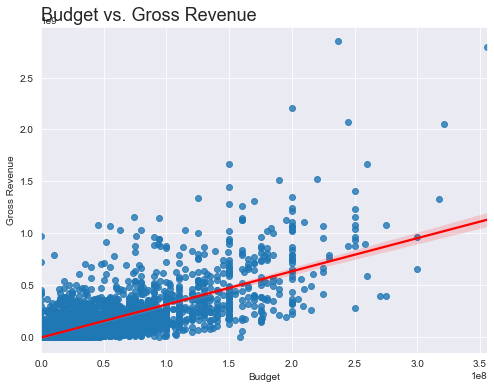

In [93]:
# plotting Regression plot
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.regplot(x='budget',y='gross',data=Movies_Data,line_kws={'color':'r'})


# add annotations and visuals
plt.title('Budget vs. Gross Revenue', loc='left', fontsize=18);
plt.xlabel('Budget');
plt.ylabel('Gross Revenue');

From the regression plot, we discovered that:

1. It is a positive correlation. 

2. We observed that film with higher budget have higher chances of getting more gross revenue. this is beacuse with higher budget film makers can get good actors and good production team which automatically increases the chances of a movie becoming hit. 

3. we can see thier are many outliers in this graph suggesting thier are other factors which influence how well the movie will do. we will be exploring those other factors using heat maps.

<br>

#### 2. Correlation Matrix

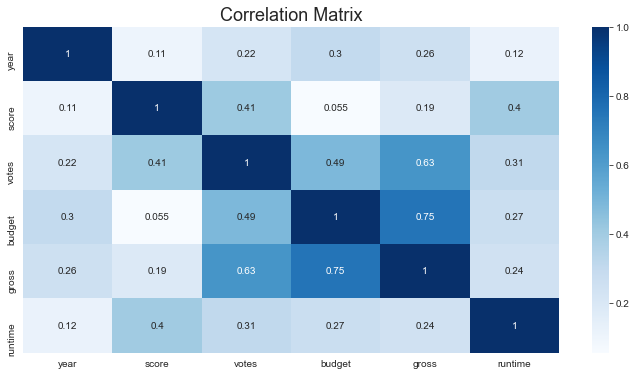

In [95]:
# Plotting Heat map
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.heatmap(Movies_Data.corr(method='pearson'),annot=True,cmap='Blues')

# Adding Annotations and Visuals 
plt.title('Correlation Matrix',fontsize=18);

From above heat map we discovered that:

1. We can see Budget and Number of votes have positive realtion with net revenue/gross of the movie.
2. Breaking the expectatons score of a movie have the weakest correaltion with the total revenue of the movie.
3. We can also see an unexpected positive correlation between runtime and score of a movie, which means movies with higher run time have higher mmvie score.
 
<br>

#### 3.  Correlation Analysis for Non Numeric Variables

Transforming non numeric variables into numeric variables and then plotting heat map of them 

In [96]:
# Transforming non numeric variables into numeric variables

Movies_Data_Numerized = Movies_Data.copy()

for col in Movies_Data_Numerized.columns:
    if (Movies_Data_Numerized[col].dtype == 'object'):
        Movies_Data_Numerized[col] = Movies_Data_Numerized[col].astype('category')
        Movies_Data_Numerized[col] = Movies_Data_Numerized[col].cat.codes


Now Plotting the heat map for this New Numerized Data

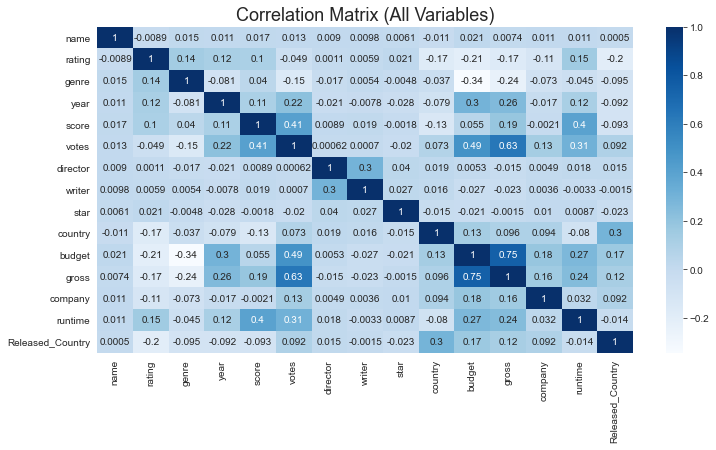

In [99]:
# Plotting Heat map
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.heatmap(Movies_Data_Numerized.corr(method='pearson'),annot=True,cmap='Blues')

# Adding Annotations and Visuals 
plt.title('Correlation Matrix (All Variables)',fontsize=18);

For Better Understanding of this heat map unstacking the data and checking for high correlations

In [100]:
# Unstacking the correlations obatined from heat map
Corr_mat = Movies_Data_Numerized.corr().unstack().sort_values(ascending=False)

# checking for correlation which are greater than 0.3
Corr_mat[((Corr_mat >  0.3) & (Corr_mat != 1))]

budget   gross      0.750160
gross    budget     0.750160
         votes      0.632780
votes    gross      0.632780
budget   votes      0.486497
votes    budget     0.486497
score    votes      0.409432
votes    score      0.409432
score    runtime    0.399965
runtime  score      0.399965
votes    runtime    0.308907
runtime  votes      0.308907
year     budget     0.301032
budget   year       0.301032
dtype: float64

From above heat map and unstacked data we discovered that:

1. Results obtained from this analysis were little unexpected as seen from the heat map director, Actor, Writer  does not have high correlation with any of the variables like revenue, budget, votes, score etc.

2. Similar to above observation We can also see Rating of the movie, country in which movie originated and even the companies have very weak correaltions. destroying the myth that only good company always perform better even if movie is not that good.

3. From above heat map we can conclude Budget and votes are major factor for movie making good overall revenue.
 
***

<br>

# 5. Summary

In the final part, i will be delivering my insights and providing summary based on our analysis. 

**1. Expolatory Data Analysis Result** 

* on average around 200 movies are made per year year with obviuos exception of 2020 during to coronavirus.

* Movies like Avatar, Avengers end game and titanic can be called as greatest of all time when comparing movies with their total revenue.

* Universal pictures have made 377 number of movies in past 3 decade which is highest in the movies industry. 

**2. Expected Correlation Analysis Result**

* We expected that their will be a high correlation between budget and gross revenue which came out to be true as we can see positive 0.75 correlation between both of them.

* Apart from this we can also see the number of votes on a movie also have a very good correlation with the total reveue of the movie.

**3. Unexpected Correlation Analysis Results**

* director, Actor, Writer  does not have high correlation with any of the variables like revenue, budget, votes, score etc.

* Similar to above observation We can also see Rating of the movie, country in which movie originated and even the companies have very weak correaltions. destroying the myth that only good company always perform better even if movie is not that good.


***
##  Thanks for reading
***
